In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

di notebook ini, kamu akan mengeksplor linear regression menggunakan database yang simple.

## Learning objectives:

Setelah melakukan latihan ini, kamu akan tau bagaimana tuning **hyperparameter** berikut:
- learning rate
- jumlah epoch
- ukuran batch

Menginterpretasikan berbagai jenis **kurva loss**

## Import modul yang dibutuhkan

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Mendefinisikan fungsi untuk membangun dan melatih model

Kode dibawah mendefinisikan dua fungsi :
- `build_model(my_learning_rate)`, dimana akan membuat empty model
- `train_model(model, feature, label, epochs)`, dimana akan melatih model dengan data (feature dan label) yang telah diberikan

In [3]:
def build_model(my_learning_rate):
    # membuat dan compile model regresi linear yang simpel
    model = tf.keras.models.Sequential()
    
    # membuat kerangka dari model
    # sederhana , hanya 1 node di dalam 1 layer
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    # compile model
    # konfigurasi training untuk meminimalkan mean squared error
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

def train_model(model, feature, label, epochs, batch_size):
    
    # training model dengan data yang diberikan.
    
    # model akan ditraining sejumlah epoch yang telah ditentukan, secara berkala akan mempelajari bagaimana feature berelasi dengan label
    history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)
    
    # mendapatkan bobot model dan bias
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    epochs = history.epoch
    
    # mendapatkan history (snapshot) dari setiap epoch
    hist = pd.DataFrame(history.history)
    
    # mendapatkan nilai root mean squared error di setiap epoch
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse

print("Define create_model and train_model")

Define create_model and train_model


## Mendifinisikan plotting functions

Kita menggunakan library Python yang sangat populer yaitu Matplotlib untuk membuat 2 plot berikut:
- plot nilai feature vs nilai label, dan sebuah garis menunjukkan output dari model
- kurva loss

In [4]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    
    # memberi label pada sumbu
    plt.xlabel("feature")
    plt.ylabel("label")
    
    # memplotkan feature dan label
    plt.scatter(feature, label)
    
    # membuat garis merah merepresentasikan model. Garis merah mulai dari koordinat (x0, y0) dan berakhir di koordinat (x1, y1)
    x0 = 0
    y0 = trained_bias
    x1 = my_feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    
    # render
    plt.show()
    

def plot_the_loss_curve(epochs, rmse):
    # plot kurva loss, dimana menunjukkan loss vs epoch
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()
    
print("Defined the plot_the_model and plot_the_loss_curve functions")

Defined the plot_the_model and plot_the_loss_curve functions


## Mendefinisikan dataset

dataset berisi 12 example. Setiap Example berisi 1 label dan 1 feature.

In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Menspesifikasikan hyperparameter

- learning rate
- epochs
- batch_size

Epoch 1/10
1/1 [==============================] - 0s 199ms/step - loss: 250.9020 - root_mean_squared_error: 15.8399
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 242.7136 - root_mean_squared_error: 15.5793
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 236.9046 - root_mean_squared_error: 15.3917
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 232.1180 - root_mean_squared_error: 15.2354
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 227.9253 - root_mean_squared_error: 15.0972
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 224.1282 - root_mean_squared_error: 14.9709
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 220.6165 - root_mean_squared_error: 14.8532
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 217.3218 - root_mean_squared_error: 14.7418
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 214.1983 - root_

/home/nardiyansah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


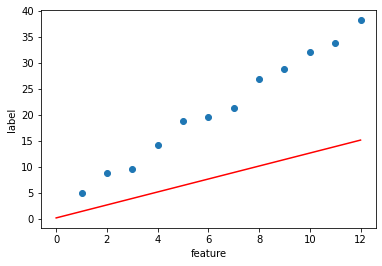

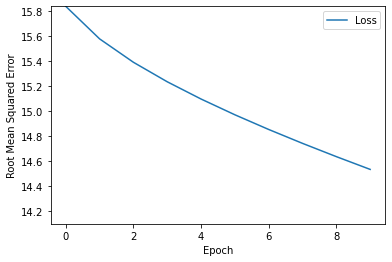

In [8]:
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/20
1/1 [==============================] - 0s 195ms/step - loss: 311.2620 - root_mean_squared_error: 17.6426
Epoch 2/20
1/1 [==============================] - 0s 2ms/step - loss: 302.1306 - root_mean_squared_error: 17.3819
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 295.6375 - root_mean_squared_error: 17.1941
Epoch 4/20
1/1 [==============================] - 0s 3ms/step - loss: 290.2782 - root_mean_squared_error: 17.0376
Epoch 5/20
1/1 [==============================] - 0s 5ms/step - loss: 285.5772 - root_mean_squared_error: 16.8990
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 281.3145 - root_mean_squared_error: 16.7724
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 277.3677 - root_mean_squared_error: 16.6544
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 273.6606 - root_mean_squared_error: 16.5427
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 270.1427 - root_

/home/nardiyansah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


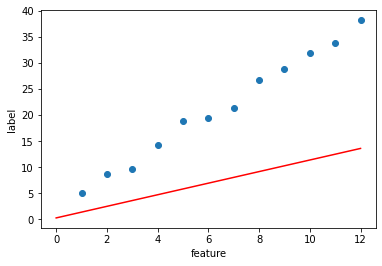

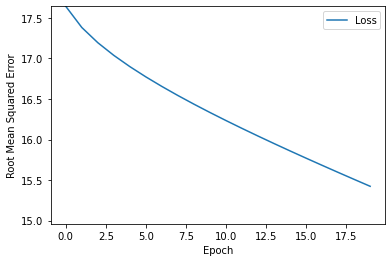

In [14]:
learning_rate=0.01
epochs= 20   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Solusi dari Google

Epoch 1/450
1/1 [==============================] - 0s 282ms/step - loss: 971.9974 - root_mean_squared_error: 31.1769
Epoch 2/450
1/1 [==============================] - 0s 4ms/step - loss: 955.7979 - root_mean_squared_error: 30.9160
Epoch 3/450
1/1 [==============================] - 0s 3ms/step - loss: 944.1772 - root_mean_squared_error: 30.7275
Epoch 4/450
1/1 [==============================] - 0s 5ms/step - loss: 934.5251 - root_mean_squared_error: 30.5700
Epoch 5/450
1/1 [==============================] - 0s 4ms/step - loss: 926.0137 - root_mean_squared_error: 30.4305
Epoch 6/450
1/1 [==============================] - 0s 3ms/step - loss: 918.2598 - root_mean_squared_error: 30.3028
Epoch 7/450
1/1 [==============================] - 0s 5ms/step - loss: 911.0496 - root_mean_squared_error: 30.1836
Epoch 8/450
1/1 [==============================] - 0s 3ms/step - loss: 904.2502 - root_mean_squared_error: 30.0708
Epoch 9/450
1/1 [==============================] - 0s 4ms/step - loss: 897.773

1/1 [==============================] - 0s 2ms/step - loss: 614.2380 - root_mean_squared_error: 24.7838
Epoch 72/450
1/1 [==============================] - 0s 7ms/step - loss: 610.2730 - root_mean_squared_error: 24.7037
Epoch 73/450
1/1 [==============================] - 0s 3ms/step - loss: 606.3215 - root_mean_squared_error: 24.6236
Epoch 74/450
1/1 [==============================] - 0s 5ms/step - loss: 602.3832 - root_mean_squared_error: 24.5435
Epoch 75/450
1/1 [==============================] - 0s 4ms/step - loss: 598.4583 - root_mean_squared_error: 24.4634
Epoch 76/450
1/1 [==============================] - 0s 3ms/step - loss: 594.5467 - root_mean_squared_error: 24.3833
Epoch 77/450
1/1 [==============================] - 0s 2ms/step - loss: 590.6484 - root_mean_squared_error: 24.3033
Epoch 78/450
1/1 [==============================] - 0s 3ms/step - loss: 586.7635 - root_mean_squared_error: 24.2232
Epoch 79/450
1/1 [==============================] - 0s 3ms/step - loss: 582.8918 - ro

1/1 [==============================] - 0s 3ms/step - loss: 368.6314 - root_mean_squared_error: 19.1998
Epoch 142/450
1/1 [==============================] - 0s 4ms/step - loss: 365.5898 - root_mean_squared_error: 19.1204
Epoch 143/450
1/1 [==============================] - 0s 2ms/step - loss: 362.5614 - root_mean_squared_error: 19.0410
Epoch 144/450
1/1 [==============================] - 0s 4ms/step - loss: 359.5459 - root_mean_squared_error: 18.9617
Epoch 145/450
1/1 [==============================] - 0s 2ms/step - loss: 356.5437 - root_mean_squared_error: 18.8824
Epoch 146/450
1/1 [==============================] - 0s 2ms/step - loss: 353.5545 - root_mean_squared_error: 18.8030
Epoch 147/450
1/1 [==============================] - 0s 4ms/step - loss: 350.5784 - root_mean_squared_error: 18.7237
Epoch 148/450
1/1 [==============================] - 0s 2ms/step - loss: 347.6154 - root_mean_squared_error: 18.6444
Epoch 149/450
1/1 [==============================] - 0s 3ms/step - loss: 344.6

1/1 [==============================] - 0s 4ms/step - loss: 187.2305 - root_mean_squared_error: 13.6832
Epoch 212/450
1/1 [==============================] - 0s 2ms/step - loss: 185.0998 - root_mean_squared_error: 13.6051
Epoch 213/450
1/1 [==============================] - 0s 6ms/step - loss: 182.9820 - root_mean_squared_error: 13.5271
Epoch 214/450
1/1 [==============================] - 0s 2ms/step - loss: 180.8771 - root_mean_squared_error: 13.4491
Epoch 215/450
1/1 [==============================] - 0s 3ms/step - loss: 178.7850 - root_mean_squared_error: 13.3711
Epoch 216/450
1/1 [==============================] - 0s 3ms/step - loss: 176.7058 - root_mean_squared_error: 13.2931
Epoch 217/450
1/1 [==============================] - 0s 3ms/step - loss: 174.6395 - root_mean_squared_error: 13.2151
Epoch 218/450
1/1 [==============================] - 0s 4ms/step - loss: 172.5861 - root_mean_squared_error: 13.1372
Epoch 219/450
1/1 [==============================] - 0s 2ms/step - loss: 170.5

1/1 [==============================] - 0s 4ms/step - loss: 68.9321 - root_mean_squared_error: 8.3025
Epoch 282/450
1/1 [==============================] - 0s 4ms/step - loss: 67.6902 - root_mean_squared_error: 8.2274
Epoch 283/450
1/1 [==============================] - 0s 3ms/step - loss: 66.4607 - root_mean_squared_error: 8.1523
Epoch 284/450
1/1 [==============================] - 0s 6ms/step - loss: 65.2436 - root_mean_squared_error: 8.0773
Epoch 285/450
1/1 [==============================] - 0s 3ms/step - loss: 64.0389 - root_mean_squared_error: 8.0024
Epoch 286/450
1/1 [==============================] - 0s 4ms/step - loss: 62.8466 - root_mean_squared_error: 7.9276
Epoch 287/450
1/1 [==============================] - 0s 3ms/step - loss: 61.6667 - root_mean_squared_error: 7.8528
Epoch 288/450
1/1 [==============================] - 0s 2ms/step - loss: 60.4991 - root_mean_squared_error: 7.7781
Epoch 289/450
1/1 [==============================] - 0s 6ms/step - loss: 59.3439 - root_mean_s

1/1 [==============================] - 0s 3ms/step - loss: 10.7133 - root_mean_squared_error: 3.2731
Epoch 353/450
1/1 [==============================] - 0s 2ms/step - loss: 10.3071 - root_mean_squared_error: 3.2105
Epoch 354/450
1/1 [==============================] - 0s 3ms/step - loss: 9.9115 - root_mean_squared_error: 3.1483
Epoch 355/450
1/1 [==============================] - 0s 2ms/step - loss: 9.5265 - root_mean_squared_error: 3.0865
Epoch 356/450
1/1 [==============================] - 0s 4ms/step - loss: 9.1519 - root_mean_squared_error: 3.0252
Epoch 357/450
1/1 [==============================] - 0s 4ms/step - loss: 8.7878 - root_mean_squared_error: 2.9644
Epoch 358/450
1/1 [==============================] - 0s 2ms/step - loss: 8.4340 - root_mean_squared_error: 2.9041
Epoch 359/450
1/1 [==============================] - 0s 3ms/step - loss: 8.0905 - root_mean_squared_error: 2.8444
Epoch 360/450
1/1 [==============================] - 0s 5ms/step - loss: 7.7572 - root_mean_squared_

Epoch 424/450
1/1 [==============================] - 0s 2ms/step - loss: 1.2922 - root_mean_squared_error: 1.1368
Epoch 425/450
1/1 [==============================] - 0s 3ms/step - loss: 1.2863 - root_mean_squared_error: 1.1342
Epoch 426/450
1/1 [==============================] - 0s 2ms/step - loss: 1.2804 - root_mean_squared_error: 1.1316
Epoch 427/450
1/1 [==============================] - 0s 2ms/step - loss: 1.2746 - root_mean_squared_error: 1.1290
Epoch 428/450
1/1 [==============================] - 0s 4ms/step - loss: 1.2688 - root_mean_squared_error: 1.1264
Epoch 429/450
1/1 [==============================] - 0s 3ms/step - loss: 1.2630 - root_mean_squared_error: 1.1238
Epoch 430/450
1/1 [==============================] - 0s 3ms/step - loss: 1.2573 - root_mean_squared_error: 1.1213
Epoch 431/450
1/1 [==============================] - 0s 3ms/step - loss: 1.2516 - root_mean_squared_error: 1.1187
Epoch 432/450
1/1 [==============================] - 0s 2ms/step - loss: 1.2459 - root_m

/home/nardiyansah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


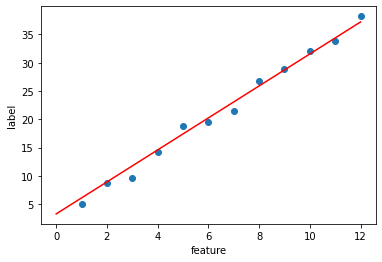

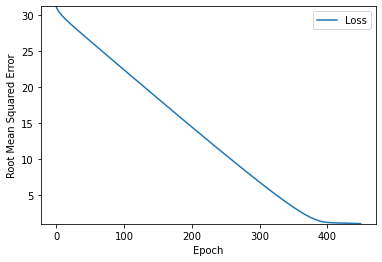

In [15]:

learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500
1/1 [==============================] - 0s 202ms/step - loss: 1244.1853 - root_mean_squared_error: 35.2730
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 6633860.5000 - root_mean_squared_error: 2575.6282
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 1228.7159 - root_mean_squared_error: 35.0530
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 7.5100 - root_mean_squared_error: 2.7404
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1.8220 - root_mean_squared_error: 1.3498
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 1.6818 - root_mean_squared_error: 1.2968
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1.6270 - root_mean_squared_error: 1.2755
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 1.5758 - root_mean_squared_error: 1.2553
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 1.5257 - root_

1/1 [==============================] - 0s 4ms/step - loss: 126625.5938 - root_mean_squared_error: 355.8449
Epoch 72/500
1/1 [==============================] - 0s 3ms/step - loss: 104650.5234 - root_mean_squared_error: 323.4973
Epoch 73/500
1/1 [==============================] - 0s 3ms/step - loss: 94961.4922 - root_mean_squared_error: 308.1582
Epoch 74/500
1/1 [==============================] - 0s 2ms/step - loss: 94968.0938 - root_mean_squared_error: 308.1689
Epoch 75/500
1/1 [==============================] - 0s 4ms/step - loss: 103873.0000 - root_mean_squared_error: 322.2933
Epoch 76/500
1/1 [==============================] - 0s 3ms/step - loss: 122039.3672 - root_mean_squared_error: 349.3413
Epoch 77/500
1/1 [==============================] - 0s 2ms/step - loss: 149689.1406 - root_mean_squared_error: 386.8968
Epoch 78/500
1/1 [==============================] - 0s 3ms/step - loss: 184467.7500 - root_mean_squared_error: 429.4971
Epoch 79/500
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 3ms/step - loss: 170123.3906 - root_mean_squared_error: 412.4602
Epoch 140/500
1/1 [==============================] - 0s 3ms/step - loss: 168927.3906 - root_mean_squared_error: 411.0078
Epoch 141/500
1/1 [==============================] - 0s 4ms/step - loss: 168151.4531 - root_mean_squared_error: 410.0627
Epoch 142/500
1/1 [==============================] - 0s 3ms/step - loss: 167901.7344 - root_mean_squared_error: 409.7581
Epoch 143/500
1/1 [==============================] - 0s 3ms/step - loss: 168173.1406 - root_mean_squared_error: 410.0892
Epoch 144/500
1/1 [==============================] - 0s 2ms/step - loss: 168862.3281 - root_mean_squared_error: 410.9286
Epoch 145/500
1/1 [==============================] - 0s 4ms/step - loss: 169794.8906 - root_mean_squared_error: 412.0618
Epoch 146/500
1/1 [==============================] - 0s 5ms/step - loss: 170763.4531 - root_mean_squared_error: 413.2354
Epoch 147/500
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 170458.5938 - root_mean_squared_error: 412.8663
Epoch 207/500
1/1 [==============================] - 0s 3ms/step - loss: 170419.9375 - root_mean_squared_error: 412.8195
Epoch 208/500
1/1 [==============================] - 0s 3ms/step - loss: 170384.7344 - root_mean_squared_error: 412.7769
Epoch 209/500
1/1 [==============================] - 0s 2ms/step - loss: 170359.6094 - root_mean_squared_error: 412.7464
Epoch 210/500
1/1 [==============================] - 0s 3ms/step - loss: 170348.5000 - root_mean_squared_error: 412.7330
Epoch 211/500
1/1 [==============================] - 0s 2ms/step - loss: 170352.3594 - root_mean_squared_error: 412.7376
Epoch 212/500
1/1 [==============================] - 0s 3ms/step - loss: 170368.8750 - root_mean_squared_error: 412.7577
Epoch 213/500
1/1 [==============================] - 0s 3ms/step - loss: 170393.4062 - root_mean_squared_error: 412.7874
Epoch 214/500
1/1 [===========================

1/1 [==============================] - 0s 4ms/step - loss: 170419.8906 - root_mean_squared_error: 412.8194
Epoch 274/500
1/1 [==============================] - 0s 4ms/step - loss: 170418.9688 - root_mean_squared_error: 412.8183
Epoch 275/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.8594 - root_mean_squared_error: 412.8170
Epoch 276/500
1/1 [==============================] - 0s 3ms/step - loss: 170416.8125 - root_mean_squared_error: 412.8157
Epoch 277/500
1/1 [==============================] - 0s 3ms/step - loss: 170416.0781 - root_mean_squared_error: 412.8148
Epoch 278/500
1/1 [==============================] - 0s 4ms/step - loss: 170415.6562 - root_mean_squared_error: 412.8143
Epoch 279/500
1/1 [==============================] - 0s 3ms/step - loss: 170415.6875 - root_mean_squared_error: 412.8144
Epoch 280/500
1/1 [==============================] - 0s 3ms/step - loss: 170416.1094 - root_mean_squared_error: 412.8148
Epoch 281/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 170417.9531 - root_mean_squared_error: 412.8171
Epoch 341/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.8750 - root_mean_squared_error: 412.8170
Epoch 342/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.7812 - root_mean_squared_error: 412.8169
Epoch 343/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 344/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 345/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 346/500
1/1 [==============================] - 0s 11ms/step - loss: 170417.2656 - root_mean_squared_error: 412.8163
Epoch 347/500
1/1 [==============================] - 0s 5ms/step - loss: 170417.2500 - root_mean_squared_error: 412.8163
Epoch 348/500
1/1 [==========================

1/1 [==============================] - 0s 2ms/step - loss: 170417.7656 - root_mean_squared_error: 412.8169
Epoch 408/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 409/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 410/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.3750 - root_mean_squared_error: 412.8164
Epoch 411/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.2344 - root_mean_squared_error: 412.8162
Epoch 412/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.2656 - root_mean_squared_error: 412.8163
Epoch 413/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.2969 - root_mean_squared_error: 412.8163
Epoch 414/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.3281 - root_mean_squared_error: 412.8163
Epoch 415/500
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 170417.8750 - root_mean_squared_error: 412.8170
Epoch 475/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.7656 - root_mean_squared_error: 412.8169
Epoch 476/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 477/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 478/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 479/500
1/1 [==============================] - 0s 5ms/step - loss: 170417.3438 - root_mean_squared_error: 412.8163
Epoch 480/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.3281 - root_mean_squared_error: 412.8163
Epoch 481/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.3750 - root_mean_squared_error: 412.8164
Epoch 482/500
1/1 [===========================

/home/nardiyansah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


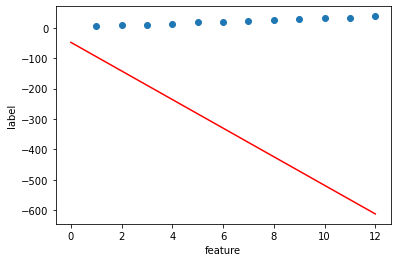

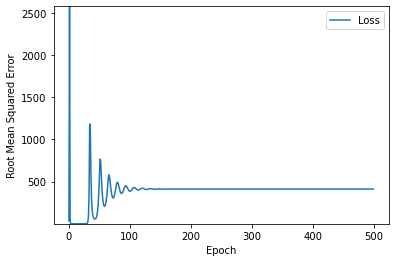

In [17]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

Epoch 1/100
1/1 [==============================] - 0s 338ms/step - loss: 871.5540 - root_mean_squared_error: 29.5221
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 724.3289 - root_mean_squared_error: 26.9134
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 630.3216 - root_mean_squared_error: 25.1062
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 558.7531 - root_mean_squared_error: 23.6380
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 500.2464 - root_mean_squared_error: 22.3662
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 450.5356 - root_mean_squared_error: 21.2258
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 407.2727 - root_mean_squared_error: 20.1810
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 369.0091 - root_mean_squared_error: 19.2096
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 334.779

1/1 [==============================] - 0s 4ms/step - loss: 1.1127 - root_mean_squared_error: 1.0549
Epoch 73/100
1/1 [==============================] - 0s 4ms/step - loss: 1.1044 - root_mean_squared_error: 1.0509
Epoch 74/100
1/1 [==============================] - 0s 2ms/step - loss: 1.0959 - root_mean_squared_error: 1.0469
Epoch 75/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0873 - root_mean_squared_error: 1.0428
Epoch 76/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0787 - root_mean_squared_error: 1.0386
Epoch 77/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0699 - root_mean_squared_error: 1.0344
Epoch 78/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0611 - root_mean_squared_error: 1.0301
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0523 - root_mean_squared_error: 1.0258
Epoch 80/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0435 - root_mean_squared_error: 1.0

/home/nardiyansah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


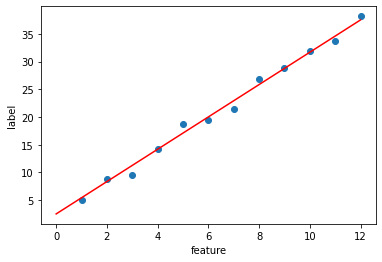

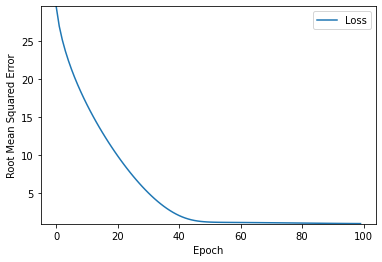

In [19]:
# Set the learning rate and number of epochs
learning_rate= 0.1  # Replace ? with a floating-point number
epochs= 100   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Solusi dari Google

Epoch 1/70
1/1 [==============================] - 0s 212ms/step - loss: 190.1897 - root_mean_squared_error: 13.7909
Epoch 2/70
1/1 [==============================] - 0s 3ms/step - loss: 102.9802 - root_mean_squared_error: 10.1479
Epoch 3/70
1/1 [==============================] - 0s 2ms/step - loss: 62.7837 - root_mean_squared_error: 7.9236
Epoch 4/70
1/1 [==============================] - 0s 7ms/step - loss: 39.6693 - root_mean_squared_error: 6.2984
Epoch 5/70
1/1 [==============================] - 0s 5ms/step - loss: 25.3574 - root_mean_squared_error: 5.0356
Epoch 6/70
1/1 [==============================] - 0s 3ms/step - loss: 16.2420 - root_mean_squared_error: 4.0301
Epoch 7/70
1/1 [==============================] - 0s 5ms/step - loss: 10.3968 - root_mean_squared_error: 3.2244
Epoch 8/70
1/1 [==============================] - 0s 4ms/step - loss: 6.6703 - root_mean_squared_error: 2.5827
Epoch 9/70
1/1 [==============================] - 0s 3ms/step - loss: 4.3281 - root_mean_squared_er

/home/nardiyansah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


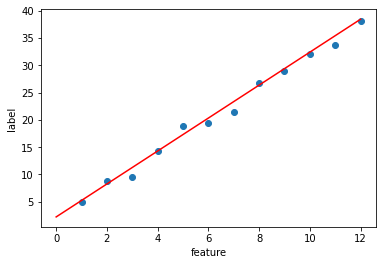

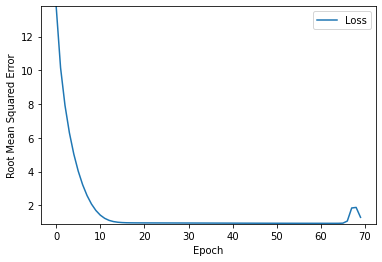

In [20]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 276.0215 - root_mean_squared_error: 16.6059
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 231.6868 - root_mean_squared_error: 15.1801
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 178.1284 - root_mean_squared_error: 13.3421
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 135.0881 - root_mean_squared_error: 11.6061
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 123.4821 - root_mean_squared_error: 11.1122
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 110.1586 - root_mean_squared_error: 10.4906
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 88.0420 - root_mean_squared_error: 9.3821
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 73.7200 - root_mean_squared_error: 8.5831
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 67.0436 - roo

2/2 [==============================] - 0s 1ms/step - loss: 0.9295 - root_mean_squared_error: 0.9629
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 1.0359 - root_mean_squared_error: 1.0176
Epoch 75/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9692 - root_mean_squared_error: 0.9834
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 1.0500 - root_mean_squared_error: 1.0191
Epoch 77/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8380 - root_mean_squared_error: 0.9149
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9874 - root_mean_squared_error: 0.9937
Epoch 79/100
2/2 [==============================] - 0s 5ms/step - loss: 1.0407 - root_mean_squared_error: 1.0177
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 1.0120 - root_mean_squared_error: 1.0020
Epoch 81/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9492 - root_mean_squared_error: 0.9

/home/nardiyansah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


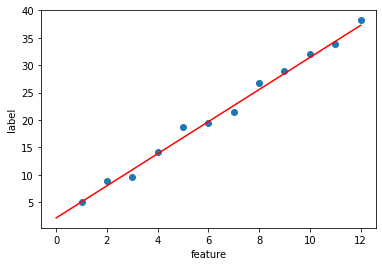

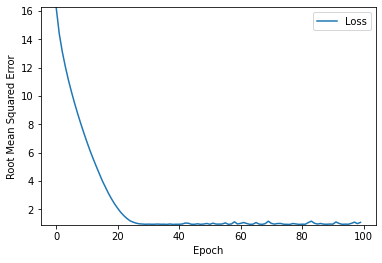

In [23]:
learning_rate=0.05
epochs=100
my_batch_size= 6  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Solusi dari Google

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 781.4418 - root_mean_squared_error: 27.5592
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 582.2531 - root_mean_squared_error: 23.8491
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 299.9668 - root_mean_squared_error: 16.7769
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 340.1917 - root_mean_squared_error: 18.2449
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 214.5961 - root_mean_squared_error: 14.5657
Epoch 6/100
12/12 [==============================] - 0s 963us/step - loss: 98.3984 - root_mean_squared_error: 9.7183
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 90.0828 - root_mean_squared_error: 9.2391
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 32.2538 - root_mean_squared_error: 5.6096
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - l

12/12 [==============================] - 0s 1ms/step - loss: 0.7270 - root_mean_squared_error: 0.8141
Epoch 73/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6467 - root_mean_squared_error: 0.7587
Epoch 74/100
12/12 [==============================] - 0s 1ms/step - loss: 1.1796 - root_mean_squared_error: 1.0154
Epoch 75/100
12/12 [==============================] - 0s 1ms/step - loss: 0.8917 - root_mean_squared_error: 0.9364
Epoch 76/100
12/12 [==============================] - 0s 1ms/step - loss: 1.5183 - root_mean_squared_error: 1.1997
Epoch 77/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6776 - root_mean_squared_error: 0.7793
Epoch 78/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6047 - root_mean_squared_error: 0.7670
Epoch 79/100
12/12 [==============================] - 0s 1ms/step - loss: 1.8703 - root_mean_squared_error: 1.3444
Epoch 80/100
12/12 [==============================] - 0s 1ms/step - loss: 1.3370 - root_mean_

/home/nardiyansah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


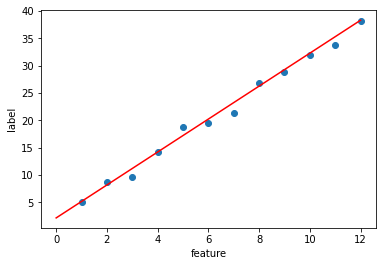

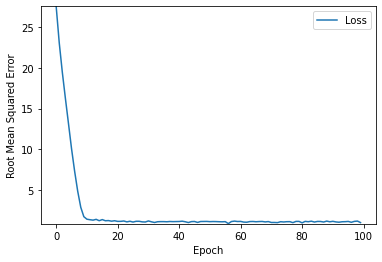

In [24]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=100
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Ringkasan tuning hyperparameter

banyak dari masalah machine learning membutuhkan tuning hyperparameter. Sayangnya, kita tidak dapat menyediakan aturan yang baku untuk tuning hyperparameter untuk setiap model. Mengecilkan learning rate dapat membuat 1 model konvergen secara efisien tapi dapat membuat model lainnya konvergen sangat lambat. Kamu harus bereksperimen untuk mencari settingan hyperparameter terbaik untuk datasetmu. Karena itu, ini adalah beberapa aturan praktis :
- Training loss harus terus menurun, di awal curam, makin menuju akhir makin landai mendekati 0
- Jika training loss tidak membentuk konvergen, coba untuk berlatih dengan lebih banyak epoch
- Jika training loss turun dengan sangat lambat, naikkan learning rate. Catat! menyetting learning rate terlalu tinggi dapat menyebabkan training loss malah tidak konvergen
- Jika training loss berubah terlalu liar (naik turun terlalu ekstrem), turunkan learning rate.
- Menurunkan learning rate sembari menaikkan jumlah epochs atau batch size biasanya menjadi good combination.
- Menyetting batch size terlalu kecil juga bisa menyebabkan ketidakstabilan. Pertama, coba batch size yang besar. Kemudian, kecilkan batch size sampai melihat degradasi (perbedaan mencolok mungkin, atau ketidakstabilan).
- Untuk real-world dataset biasanya berisi example dalam jumlah yang sangat besar, keseluruhan dataset mungkin tidak cukup ke dalam memori. Di beberapa kasus, kamu butuh untuk mengurangi batch size supaya dapat cukup muat di memory.

Ingat: kombinasi ideal dari hyperparameter itu tergantung, jadi kamu harus selalu eksperimen dan mengeceknya.